___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [2]:
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import math
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [4]:
df_org = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')

In [5]:
df = df_org.copy()

In [6]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [7]:
###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", 'yellow', attrs=['bold']), df.shape,'\n', 
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n",'yellow', attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", 'yellow', attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", 'yellow', attrs=['bold']), missing_values(df),'\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ') 
    print(colored('*'*100, 'red', attrs=['bold']), sep='')

In [8]:
first_looking(df)

Shape:(10000, 13)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  object 
 4   gender           10000 non-null  object 
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  int64  
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB
None
********

In [9]:
def summary(column):
    print(colored("Column: ",'yellow', attrs=['bold']), column)
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values: ", 'yellow', attrs=['bold']), df[column].isnull().sum())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values(%): ", 'yellow', attrs=['bold']), round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Unique values: ", 'yellow', attrs=['bold']), df[column].nunique())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Value counts: \n", 'yellow', attrs=['bold']), df[column].value_counts(dropna = False), sep='')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [10]:
summary("customerid")

Column:  customerid
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  10000
****************************************************************************************************
Value counts: 
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: customerid, Length: 10000, dtype: int64
****************************************************************************************************


*Since all values in "CustomerId" is unique, it will be dropped.*

In [11]:
df.drop("customerid", axis=1, inplace=True)

In [12]:
summary("surname")

Column:  surname
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  2932
****************************************************************************************************
Value counts: 
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: surname, Length: 2932, dtype: int64
****************************************************************************************************


*Since surname columns has a high cardinality, it will be dropped.*

In [13]:
df.drop("surname", axis=1, inplace=True)

In [14]:
summary("geography")

Column:  geography
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  3
****************************************************************************************************
Value counts: 
France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64
****************************************************************************************************


In [15]:
summary("gender")

Column:  gender
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  2
****************************************************************************************************
Value counts: 
Male      5457
Female    4543
Name: gender, dtype: int64
****************************************************************************************************


In [16]:
summary("numofproducts")

Column:  numofproducts
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  4
****************************************************************************************************
Value counts: 
1    5084
2    4590
3     266
4      60
Name: numofproducts, dtype: int64
****************************************************************************************************


In [17]:
summary("hascrcard")

Column:  hascrcard
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  2
****************************************************************************************************
Value counts: 
1    7055
0    2945
Name: hascrcard, dtype: int64
****************************************************************************************************


In [18]:
summary("isactivemember")

Column:  isactivemember
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  2
****************************************************************************************************
Value counts: 
1    5151
0    4849
Name: isactivemember, dtype: int64
****************************************************************************************************


In [19]:
num_columns = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']

In [20]:
df[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
creditscore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
estimatedsalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


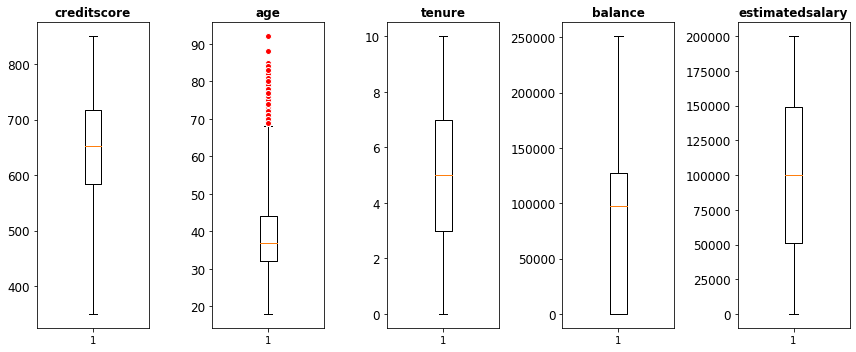

In [21]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, 5, figsize=(12,5))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df[num_columns[i]], flierprops=red_circle, whis=2)
    ax.set_title(num_columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

*There are outliers only in age column but it is not need to drop any data.*

### Target Value

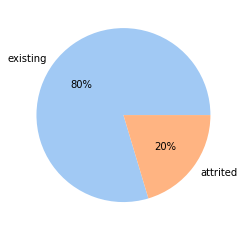

In [22]:
data = df["exited"].value_counts().values
labels = df["exited"].value_counts().index

colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = ["existing",  "attrited"], colors = colors, autopct='%.0f%%')
plt.show()

**Target variable can be admitted as imbalanced.**

In [23]:
cat_columns = ['geography', 'gender', 'numofproducts', 'hascrcard', 'isactivemember']

posx and posy should be finite values
posx and posy should be finite values


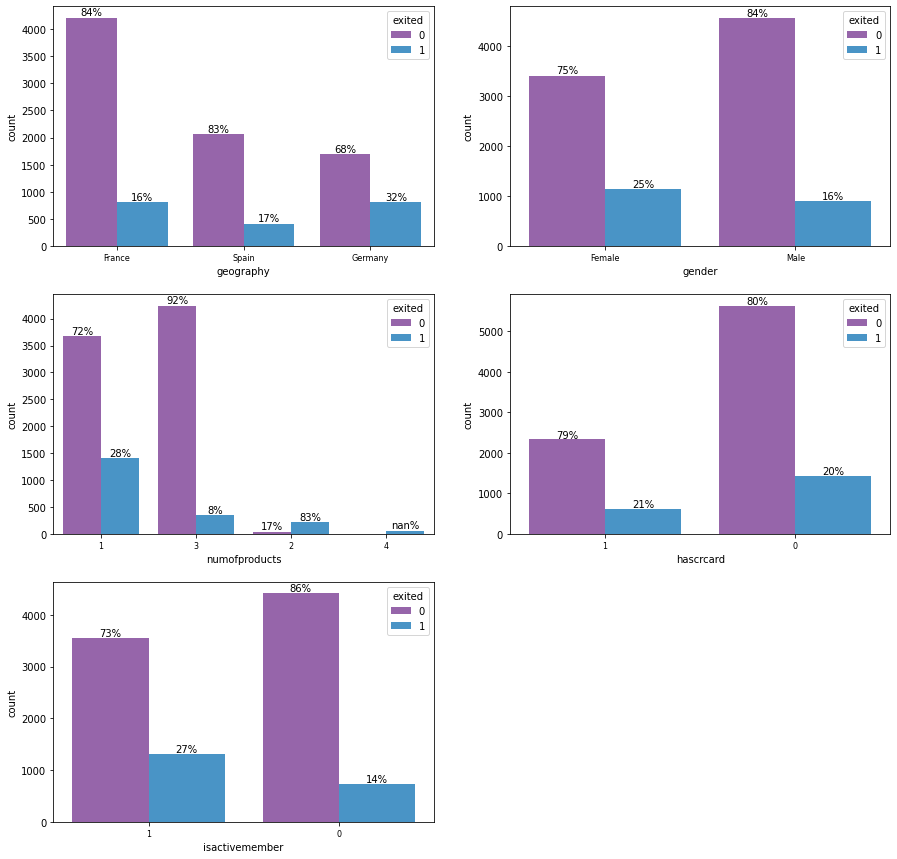

In [24]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
ax = axs.flatten()
for i in range(0,5):
    sns.countplot(df[cat_columns[i]], ax=ax[i], hue=df['exited'],palette=["#9b59b6", "#3498db"])
    ax[i].set_xticklabels(df[cat_columns[i]].unique(), fontsize=8)
    bars = ax[i].patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        ax[i].text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax[i].text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
ax[-1].set_visible(False)

**Some Results of Categoric Columns**
* For the target variable, while the rate of existing customer is 80 %, the rate of attrited customer is 20%.
* Existing customer rate is low in Germany with respect to France and Spain. Some extra promotions and advertisements can be planned for the customers in Germany. 
* Although existing customer rates are close in male and female customers, male customers are more persistent than female customers. This shows gender has a small effect on target variable.
* Existing customer rates of "hascrcard" are almost same with the target variable. This shows "hascrcard" has almost no effect on target variable.
* The existing customer rate of the "numofproducts"-3_products is very high which means customers who has 3 products are more persistent.

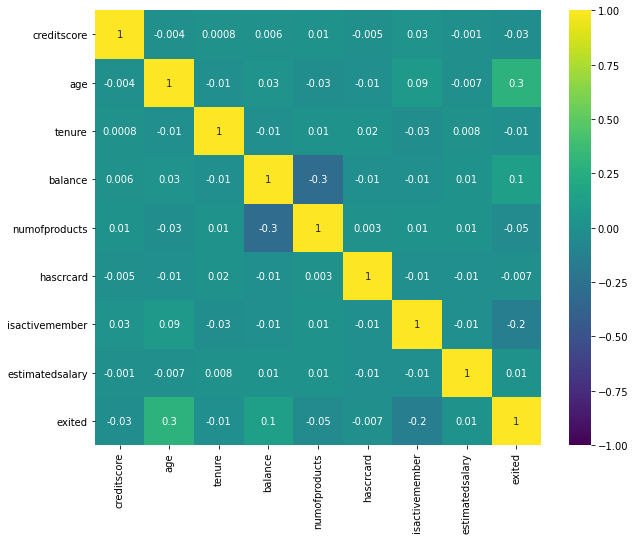

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),vmin = -1, annot=True, cmap='viridis', fmt='.1g')
plt.show()

*Correlation is very low between the features and target.*

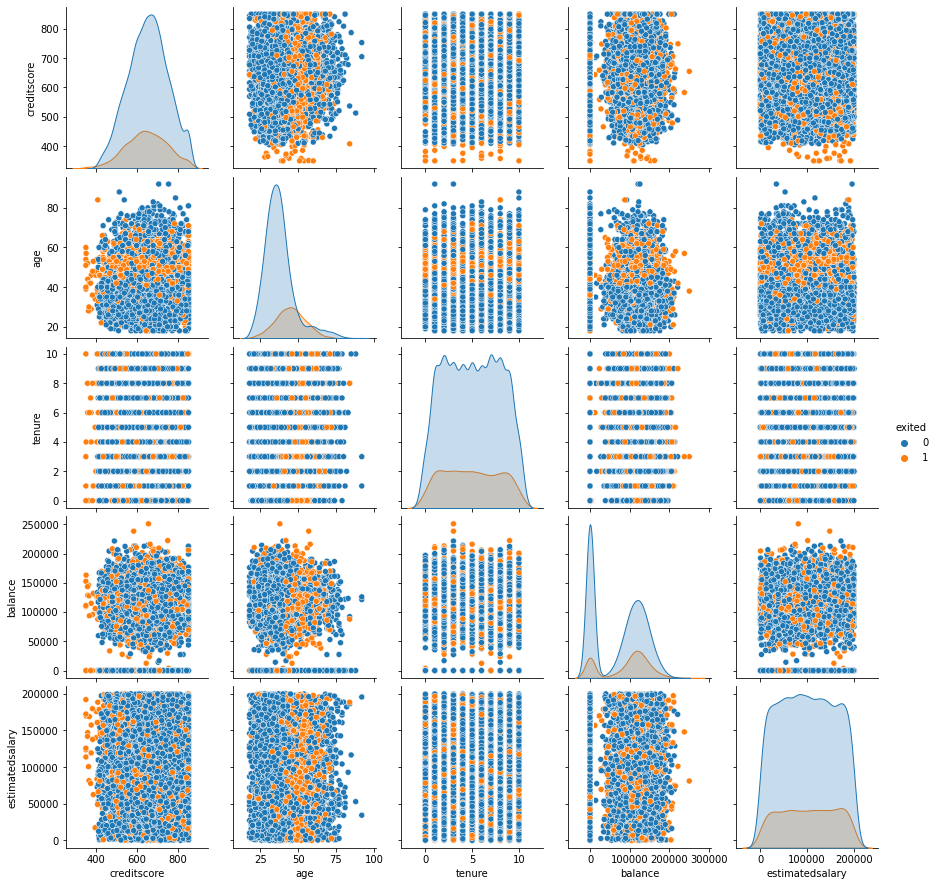

In [26]:
data = df[num_columns].join(df['exited'])
sns.pairplot(data=data, hue='exited');

In [27]:
num_columns

['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']

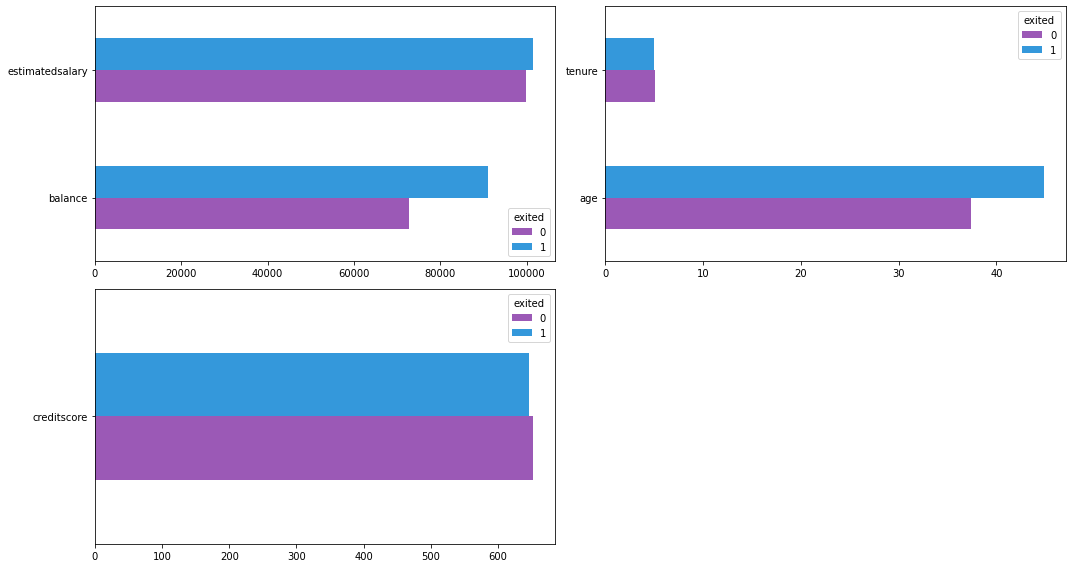

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(15,8)) 
ax = axs.flatten()
df.groupby("exited")[['balance', 'estimatedsalary']].mean().T.plot.barh(color=["#9b59b6", "#3498db"], ax=ax[0])

df.groupby("exited")[['age', 'tenure']].mean().T.plot.barh(color=["#9b59b6", "#3498db"], ax=ax[1])

df.groupby("exited")[['creditscore']].mean().T.plot.barh(color=["#9b59b6", "#3498db"], ax=ax[2])

ax[-1].set_visible(False)

plt.tight_layout()

*It seems that estimated salary, credit score, tenure has no effect on churn and age and balance has little effect.*

# Preprocessing of Data
- Train | Test Split, Scalling

In [29]:
df_dummy=pd.get_dummies(df,drop_first=True)
df_dummy.head(2).T

RowNumber,1,2
creditscore,619.00,608.00
age,42.00,41.00
tenure,2.00,1.00
balance,0.00,83807.86
numofproducts,1.00,1.00
hascrcard,1.00,0.00
isactivemember,1.00,1.00
estimatedsalary,101348.88,112542.58
exited,1.00,0.00
geography_Germany,0.00,0.00


In [30]:
X = df_dummy.drop('exited', axis=1)
y = df_dummy['exited']

In [31]:
seed = 5

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = seed)

In [33]:
scaler = StandardScaler()

In [34]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train.shape

(8500, 11)

In [36]:
X_test.shape

(1500, 11)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 64, epochs = 1000, verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___